# Logistic Regression Theories

You're familiar with **linear regression** to predict **continuous values**. You're now going to return to regression to look at how it can be used as a classifier instead to determine the likelihood of a given data point being associated with one of two categories.

**Logistic regression**, despite its name, is a classification algorithm. An interesting nuance is that it provides confidence values with its predictions since the raw output is a probability of a class between 0 and 1. The general process for this is similar to linear regression, where coefficients for various feature weights are altered in order to optimize the accuracy of subsequent predictions from the model.

**Supervised Learning** refers to a class of machine learning algorithms that can "learn" a task through **labeled training data**.

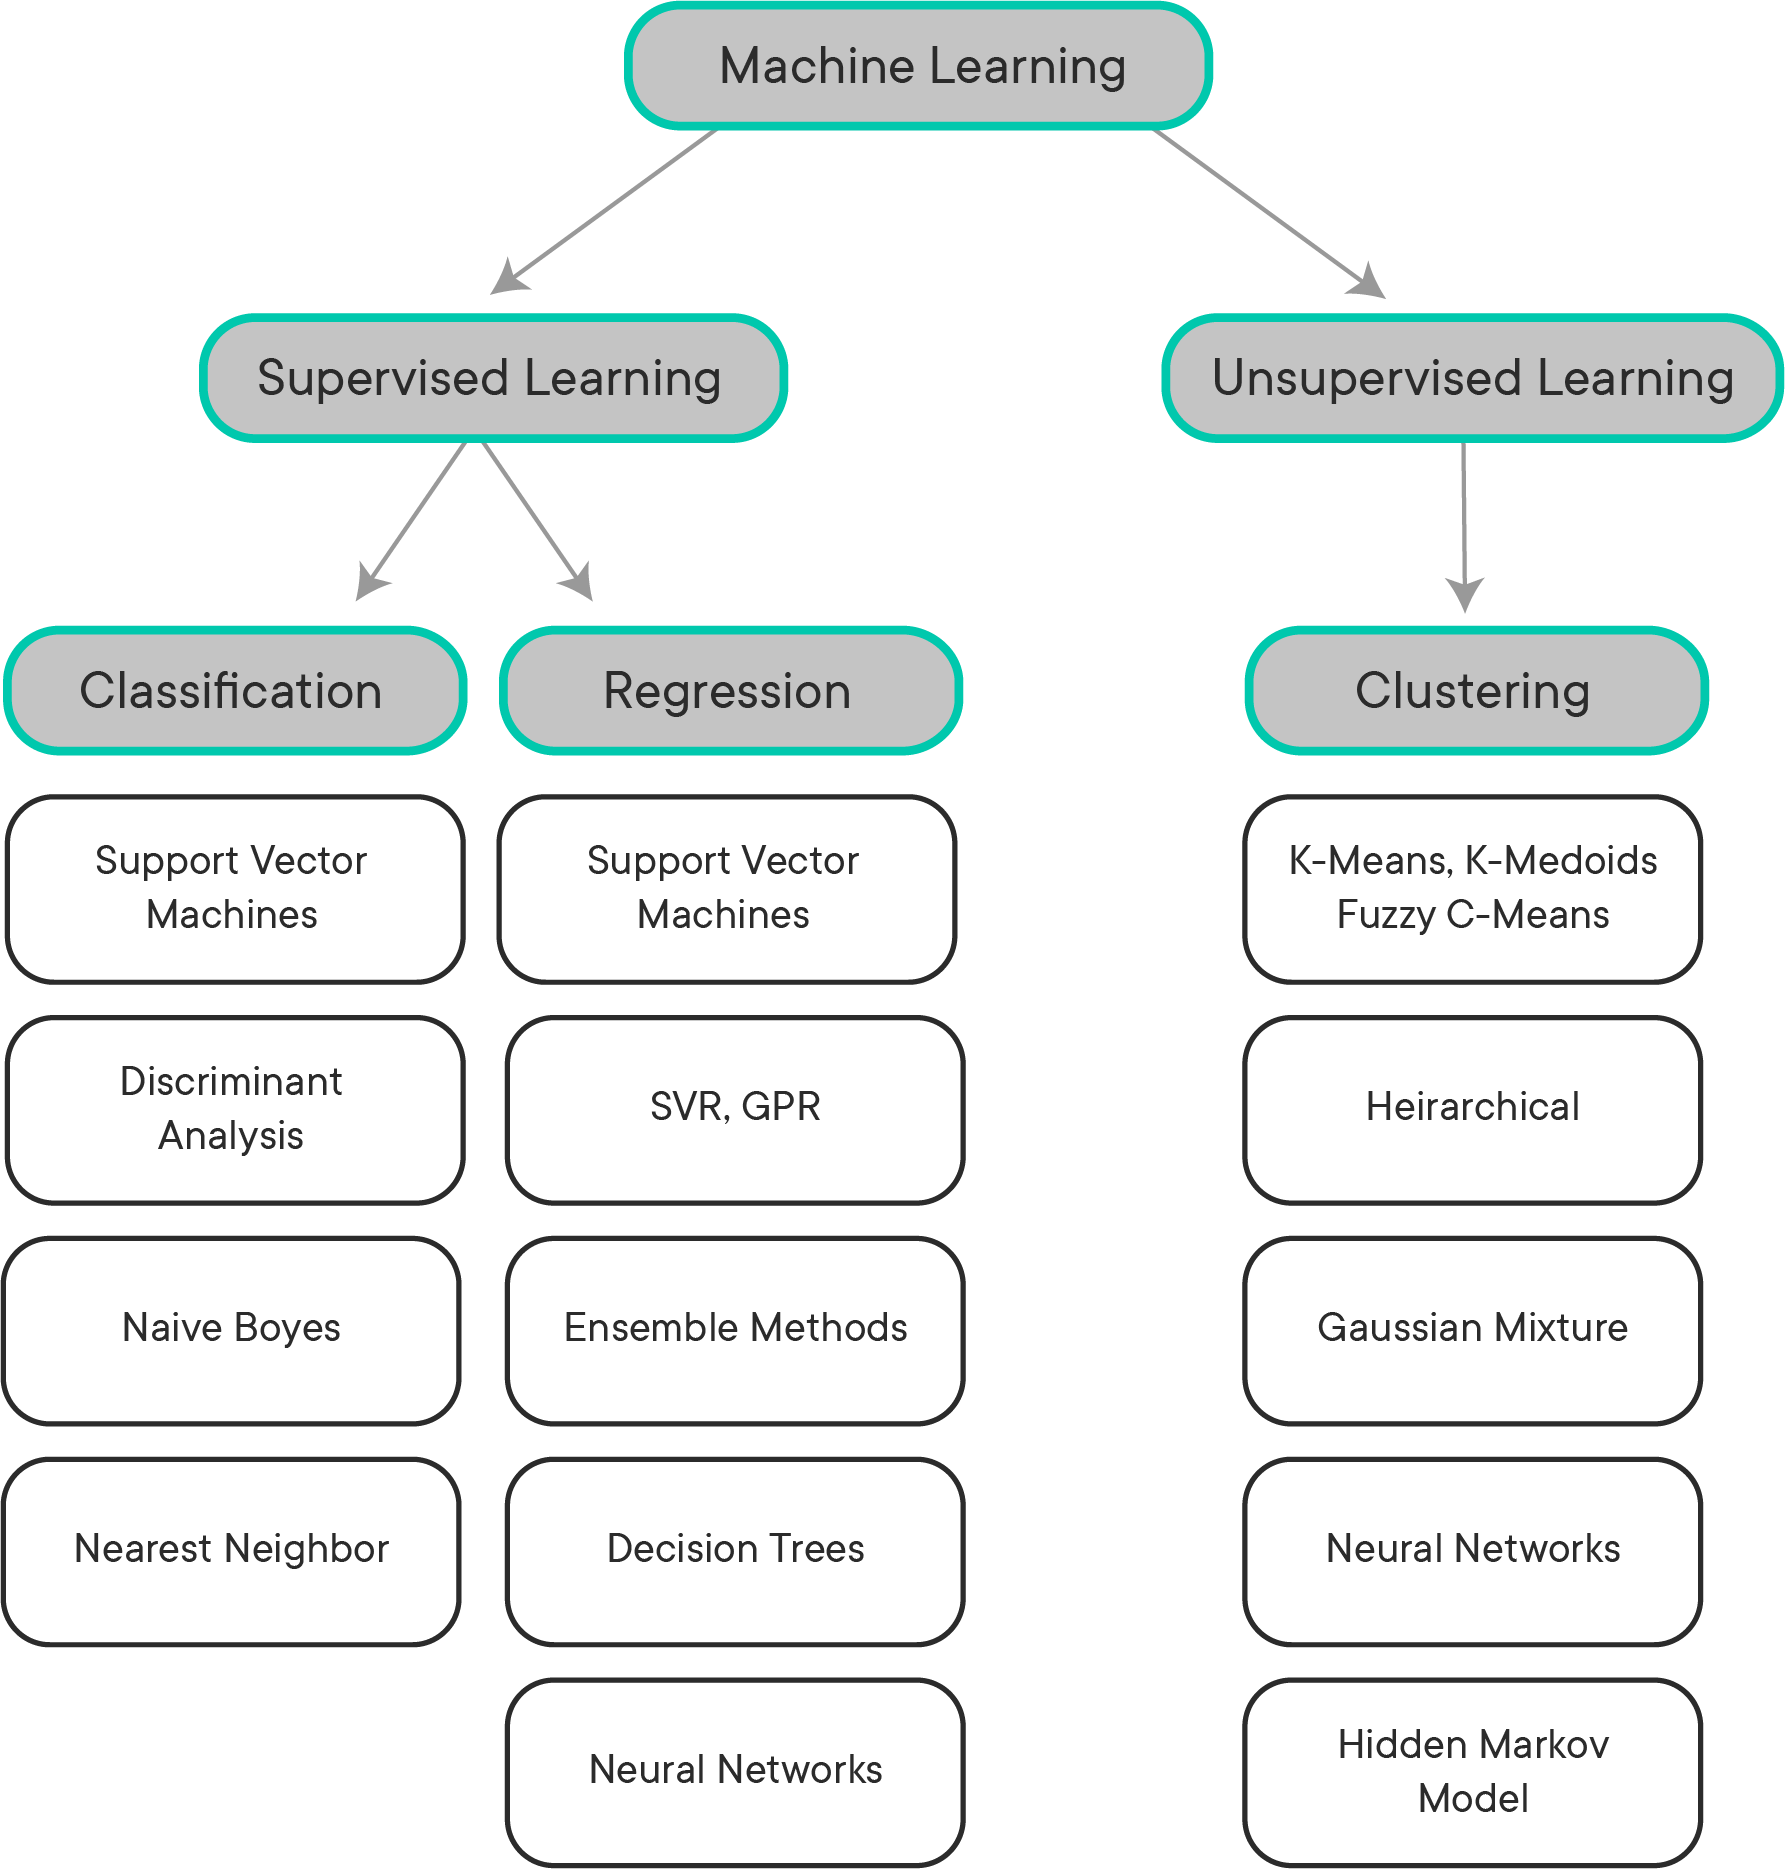

**Supervised** vs **Unsupervised** Learning: main difference between these two areas of machine learning is the need for **labeled training data**. In Supervised Learning, any data used must have a label. These labels are the ground truth , which allows our supervised learning algorithms to 'check their work'.

If our label is a real-valued number, then the supervised learning problem you're trying to solve is a regression problem.\
Classification allows us to tell if something belongs to one class or the other. For example, given various characteristics of a passenger, predict whether they will survive or not. Questions that can be answered in a True/False format (in the titanic example, "Survived" or "Not survived") are a type of **Binary Classification**. To perform binary classification, you will be introduced to **Logistic Regression**.

However, we are not limited to only two classes when working with classification algorithms -- we can have as many classes as we see fit. When a supervised learning problem has more than two classes, we refer to it as a **Multiclass Classification** problem.

**Limitations of Labeled Data**: limits the amount of available data we have for use; Of all the data in the world, only a very, very small percentage is labeled. Why? Because labeling data is a purposeful activity that can only be done by humans, and is therefore time-consuming and expensive; labels are not universal -- they are unique to the problem we're trying to solve; 

**Positive Examples** are data points that belong to the class we're training our model to recognize. When creating a dataset, make sure that your dataset contains enough **negative examples**, and that you are very thoughtful about what those negative examples actually contain!

## Logistic Regression: Real-World Example

In [1]:
#Import necessary libraries
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
#Loading dataset
import pandas as pd
salaries = pd.read_csv('salaries_final.csv', index_col=0)
salaries.head()

,Age,Education,Occupation,Relationship,Race,Sex,Target
0,39,Bachelors,Adm-clerical,Not-in-family,White,Male,<=50K
1,50,Bachelors,Exec-managerial,Husband,White,Male,<=50K
2,38,HS-grad,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,53,11th,Handlers-cleaners,Husband,Black,Male,<=50K
4,28,Bachelors,Prof-specialty,Wife,Black,Female,<=50K


For this example, you will fit a logistic regression model to `Target` using `Age`, `Race`, and `Sex`. Since `Target`, `Race`, and `Sex` are categorical, they need to be be converted to a numeric datatype first. 

The `get_dummies()` function will only convert `object` and `category` datatypes to dummy variables so it is safe to pass `Age` to `get_dummies()`. Note that we also pass two additional arguments, `drop_first=True` and `dtype=float`. The `drop_first=True` argument removes the first level for each categorical variable and the `dtype=float` argument converts the datatype of all the dummy variables to float. The data must be float in order to obtain accurate statistical results from `statsmodels`. 

In [4]:
# Convert race and sex using get_dummies() 
x_feats = ['Race', 'Sex', 'Age']
X = pd.get_dummies(salaries[x_feats], drop_first=True, dtype=float)

# Convert target using get_dummies
y = pd.get_dummies(salaries['Target'], drop_first=True, dtype=float)
y = y['>50K']

In [5]:
import statsmodels.api as sm

# Create intercept term required for sm.Logit, see documentation for more information
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

# Get results of the fit
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.498651
         Iterations 6


In [6]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   >50K   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32554
Method:                           MLE   Df Model:                            6
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                 0.09666
Time:                        01:31:42   Log-Likelihood:                -16237.
converged:                       True   LL-Null:                       -17974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.4248      0.189    -23.380      0.000      -4.796      -4.054
Age                         0.0387      0.001     38.530      0.000       0.037       0.041
Race_Asian-Pac-Islander     0.9991      0.197      5.079      0.000       0.614       1.385
Race_Black                  0.1812      0.191      0.950      0.342      -0.193       0.555
Race_Other                 -0.1143      0.282     -0.406      0.685      -0.667       0.438
Race_White                  0.8742      0.183      4.782      0.000       0.516       1.232
Sex_Male                    1.2069      0.035     34.380      0.000       1.138       1.276
===========================================================================================
"""

In [8]:
import numpy as np
np.exp(result.params)

const                      0.011977
Age                        1.039480
Race_Asian-Pac-Islander    2.715861
Race_Black                 1.198638
Race_Other                 0.891987
Race_White                 2.396965
Sex_Male                   3.343142
dtype: float64

You can also use scikit-learn to retrieve the parameter estimates. The disadvantage here though is that there are no p-values for your parameter estimates!

In [9]:
logreg = LogisticRegression(fit_intercept = False, C = 1e15, solver='liblinear')
model_log = logreg.fit(X, y)
model_log

LogisticRegression(C=1000000000000000.0, fit_intercept=False,
                   solver='liblinear')

In [10]:
model_log.coef_

array([[-4.38706343,  0.03871011,  0.96178902,  0.14397983, -0.14384057,
         0.83689457,  1.2067121 ]])

# Fitting Logistic Model Using Statsmodels - Titanic Dataset

In [11]:
# Import the data
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.shape

(891, 12)

In [16]:
# Total number of people who survived/didn't survive
# 0 indicates passenger didnt survive shipwreck
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
# Create dummy variables for categorical variables
relevant_columns = ['Pclass', 'Age', 'SibSp', 'Fare', 'Sex', 'Embarked', 'Survived']
dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first=True, dtype=float)

dummy_dataframe.shape

(891, 8)

In [18]:
# Drop missing rows
dummy_dataframe = dummy_dataframe.dropna()
dummy_dataframe.shape

(714, 8)

In [19]:
# Split the data into X and y
y = dummy_dataframe['Survived']
X = dummy_dataframe.drop(columns=['Survived'], axis=1)

In [20]:
# Build a logistic regression model using statsmodels
import statsmodels.api as sm
X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.443267
         Iterations 6


In [21]:
# Summary table
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      706
Method:                           MLE   Df Model:                            7
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                  0.3437
Time:                        01:58:00   Log-Likelihood:                -316.49
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.103e-67
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6503      0.633      8.921      0.000       4.409       6.892
Pclass        -1.2118      0.163     -7.433      0.000      -1.531      -0.892
Age           -0.0431      0.008     -5.250      0.000      -0.059      -0.027
SibSp         -0.3806      0.125     -3.048      0.002      -0.625      -0.136
Fare           0.0012      0.002      0.474      0.636      -0.004       0.006
Sex_male      -2.6236      0.217    -12.081      0.000      -3.049      -2.198
Embarked_Q    -0.8260      0.598     -1.381      0.167      -1.999       0.347
Embarked_S    -0.4130      0.269     -1.533      0.125      -0.941       0.115
==============================================================================
"""

**Based on our P-values, most of the current features appear to be significant based on a .05 significance level\
That said, the `'Embarked'` and `'Fare'` features were not significant based on their higher p-values.**

Creating a new model using influential features based on our analysis of the results above to check how model performs

In [22]:
relevant_columns = ['Pclass', 'Age', 'SibSp', 'Sex', 'Survived']
dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first=True, dtype=float)

dummy_dataframe = dummy_dataframe.dropna()

y = dummy_dataframe['Survived']
X = dummy_dataframe.drop(columns=['Survived'], axis=1)

X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.445882
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                  0.3399
Time:                        02:03:27   Log-Likelihood:                -318.36
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.089e-69
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6008      0.543     10.306      0.000       4.536       6.666
Pclass        -1.3174      0.141     -9.350      0.000      -1.594      -1.041
Age           -0.0444      0.008     -5.442      0.000      -0.060      -0.028
SibSp         -0.3761      0.121     -3.106      0.002      -0.613      -0.139
Sex_male      -2.6235      0.215    -12.229      0.000      -3.044      -2.203
==============================================================================
"""

**Note how removing the insignificant features had little impact on the $R^2$ value of our model.**

# Fitting Logistic Model Using scikit-learn - Titanic Dataset

In [23]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
# defining X & y
y = df["Survived"]
X = df.drop("Survived", axis=1)

In [25]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
#Preprocessing
#Dealing with missing values
X_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            133
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          511
Embarked         2
dtype: int64

For `Cabin` and `Embarked` (categorical features), we'll manually fill this in with "missing" labels:

In [27]:
X_train_fill_na = X_train.copy()
X_train_fill_na.fillna({"Cabin":"cabin_missing", "Embarked":"embarked_missing"}, inplace=True)
X_train_fill_na.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            133
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

For `Age` (a numeric feature), we'll use a `SimpleImputer` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)) to fill in the mean:

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

imputer.fit(X_train_fill_na[["Age"]])
age_imputed = pd.DataFrame(
    imputer.transform(X_train_fill_na[["Age"]]),
    # index is important to ensure we can concatenate with other columns
    index=X_train_fill_na.index,
    columns=["Age"]
)

X_train_fill_na["Age"] = age_imputed
X_train_fill_na.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Some of the columns of `X_train_fill_na` currently contain categorical data (i.e. Dtype `object`):

In [29]:
#Dealing with categorical data
X_train_fill_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 105 to 684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Pclass       668 non-null    int64  
 2   Name         668 non-null    object 
 3   Sex          668 non-null    object 
 4   Age          668 non-null    float64
 5   SibSp        668 non-null    int64  
 6   Parch        668 non-null    int64  
 7   Ticket       668 non-null    object 
 8   Fare         668 non-null    float64
 9   Cabin        668 non-null    object 
 10  Embarked     668 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 62.6+ KB


In [31]:
X_train_categorical = X_train_fill_na.select_dtypes(exclude=["int64", "float64"]).copy()
X_train_categorical.head()

,Name,Sex,Ticket,Cabin,Embarked
105,"Mionoff, Mr. Stoytcho",male,349207,cabin_missing,S
68,"Andersson, Miss. Erna Alexandra",female,3101281,cabin_missing,S
253,"Lobb, Mr. William Arthur",male,A/5. 3336,cabin_missing,S
320,"Dennis, Mr. Samuel",male,A/5 21172,cabin_missing,S
706,"Kelly, Mrs. Florence ""Fannie""",female,223596,cabin_missing,S


In [33]:
#convert categorical variables into dummy one-hot encoded variables
from sklearn.preprocessing import OneHotEncoder
import numpy as np

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

ohe.fit(X_train_categorical)
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    # index is important to ensure we can concatenate with other columns
    index=X_train_categorical.index,
    # we are dummying multiple columns at once, so stack the names
    columns=np.hstack(ohe.categories_)
)
X_train_ohe.head()

,"Abbing, Mr. Anthony","Abbott, Mr. Rossmore Edward","Abelson, Mrs. Samuel (Hannah Wizosky)","Adahl, Mr. Mauritz Nils Martin","Adams, Mr. John","Aks, Mrs. Sam (Leah Rosen)","Albimona, Mr. Nassef Cassem","Alexander, Mr. William","Alhomaki, Mr. Ilmari Rudolf","Allen, Miss. Elisabeth Walton",...,F33,F38,F4,G6,T,cabin_missing,C,Q,S,embarked_missing
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Instead of just selecting every single categorical feature for dummying, let's only include the ones that make sense as categories rather than being the names of individual people:

In [35]:
categorical_features = ["Sex", "Cabin", "Embarked"]
X_train_categorical = X_train_fill_na[categorical_features].copy()
X_train_categorical.head()

,Sex,Cabin,Embarked
105,male,cabin_missing,S
68,female,cabin_missing,S
253,male,cabin_missing,S
320,male,cabin_missing,S
706,female,cabin_missing,S


In [36]:
ohe.fit(X_train_categorical)

X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    index=X_train_categorical.index,
    columns=np.hstack(ohe.categories_)
)
X_train_ohe.head()

,female,male,A10,A14,A16,A19,A20,A23,A24,A31,...,F33,F38,F4,G6,T,cabin_missing,C,Q,S,embarked_missing
105,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
253,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
320,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
706,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Another important data preparation practice is to normalize your data. That is, if the features are on different scales, some features may impact the model more heavily then others. To level the playing field, we often normalize all features to a consistent scale of 0 to 1.

In [37]:
numeric_features = ["Pclass", "Age", "SibSp", "Fare"]
X_train_numeric = X_train_fill_na[numeric_features].copy()
X_train_numeric.head()

,Pclass,Age,SibSp,Fare
105,3,28.0,0,7.8958
68,3,17.0,4,7.9250
253,3,30.0,1,16.1000
320,3,22.0,0,7.2500
706,2,45.0,0,13.5000


Let's use a `MinMaxScaler` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)) with default parameters to create a maximum value of 1 and a minimum value of 0. This will work well with our binary one-hot encoded data.

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_scaled.head()

,Pclass,Age,SibSp,Fare
105,1.0,0.344510,0.000,0.015412
68,1.0,0.205849,0.500,0.015469
253,1.0,0.369721,0.125,0.031425
320,1.0,0.268877,0.000,0.014151
706,0.5,0.558805,0.000,0.026350


In [39]:
#concatenate both datasets
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_train_full.head()

,Pclass,Age,SibSp,Fare,female,male,A10,A14,A16,A19,...,F33,F38,F4,G6,T,cabin_missing,C,Q,S,embarked_missing
105,1.0,0.344510,0.000,0.015412,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
68,1.0,0.205849,0.500,0.015469,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
253,1.0,0.369721,0.125,0.031425,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
320,1.0,0.268877,0.000,0.014151,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
706,0.5,0.558805,0.000,0.026350,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
#Fitting the model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_full, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [41]:
#Model Evaluation
#Performance on training data
y_hat_train = logreg.predict(X_train_full)
train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    567
1    101
Name: count, dtype: int64

Residuals (proportions)
0    0.848802
1    0.151198
Name: proportion, dtype: float64


**Not bad; our classifier was about 85% correct on our training data!**

In [42]:
#Performance on Test Data
#Now let's apply the same preprocessing process to our test data, so we can evaluate the model's performance on unseen data.

# Filling in missing categorical data
X_test_fill_na = X_test.copy()
X_test_fill_na.fillna({"Cabin":"cabin_missing", "Embarked":"embarked_missing"}, inplace=True)

# Filling in missing numeric data
test_age_imputed = pd.DataFrame(
    imputer.transform(X_test_fill_na[["Age"]]),
    index=X_test_fill_na.index,
    columns=["Age"]
)
X_test_fill_na["Age"] = test_age_imputed

# Handling categorical data
X_test_categorical = X_test_fill_na[categorical_features].copy()
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    index=X_test_categorical.index,
    columns=np.hstack(ohe.categories_)
)

# Normalization
X_test_numeric = X_test_fill_na[numeric_features].copy()
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)

# Concatenating categorical and numeric data
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_full.head()

,Pclass,Age,SibSp,Fare,female,male,A10,A14,A16,A19,...,F33,F38,F4,G6,T,cabin_missing,C,Q,S,embarked_missing
495,1.0,0.368461,0.000,0.028221,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
648,1.0,0.368461,0.000,0.014737,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
278,1.0,0.079793,0.500,0.056848,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
31,0.0,0.368461,0.125,0.285990,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
255,1.0,0.357116,0.000,0.029758,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [43]:
y_hat_test = logreg.predict(X_test_full)
test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    175
1     48
Name: count, dtype: int64

Residuals (proportions)
0    0.784753
1    0.215247
Name: proportion, dtype: float64


**And still about 78% accurate on our test data!**